In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.options.display.max_columns = None

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

In [8]:
# Load the tips dataset from seaborn
compustat_df = pd.read_csv("computstat_data.csv", na_values = ["NA", "na", "?"], low_memory = False)

In [10]:
# Display the first five rows of the dataset
print("First five rows of the Financial dataset:")
print(compustat_df.head())

First five rows of the Financial dataset:
   gvkey   datadate  fyear indfmt consol popsrc datafmt   tic      cusip  \
0   1000  31dec1961   1961   INDL      C      D     STD  AE.2  000032102   
1   1000  31dec1962   1962   INDL      C      D     STD  AE.2  000032102   
2   1000  31dec1963   1963   INDL      C      D     STD  AE.2  000032102   
3   1000  31dec1964   1964   INDL      C      D     STD  AE.2  000032102   
4   1000  31dec1965   1965   INDL      C      D     STD  AE.2  000032102   

                    conm acctchg acctstd acqmeth  adrr      ajex  ajp bspr  \
0  A & E PLASTIK PAK INC     NaN     NaN     NaN   NaN  3.341831  1.0  NaN   
1  A & E PLASTIK PAK INC     NaN     NaN     NaN   NaN  3.341831  1.0  NaN   
2  A & E PLASTIK PAK INC     NaN     NaN     NaN   NaN  3.244497  1.0  NaN   
3  A & E PLASTIK PAK INC     NaN      DS     NaN   NaN  3.089999  1.0  NaN   
4  A & E PLASTIK PAK INC     NaN      DS     NaN   NaN  3.089999  1.0  NaN   

  compst curcd curncd  currtr  c

In [12]:
compustat_df.shape

(503055, 981)

In [18]:
fin_data = compustat_df[compustat_df["fyear"] >= 2000]
fin_data.shape

(235996, 981)

In [20]:
threshold = len(fin_data) * 0.50

# Drop columns where missing values are >= 50%
fin_data = fin_data.dropna(axis=1, thresh=threshold)
fin_data.shape

(235996, 317)

In [22]:
# Impute missing values with column median
fin_data = fin_data.fillna(fin_data.median(numeric_only=True))

In [26]:
missing_counts = fin_data.isnull().sum()
print(missing_counts)

gvkey           0
datadate        0
fyear           0
indfmt          0
consol          0
            ...  
spcindcd        0
spcseccd        0
state       26371
stko            0
weburl      43678
Length: 317, dtype: int64


In [28]:
fin_data.shape

(235996, 317)

In [30]:
# Find columns with missing values
missing_columns = fin_data.columns[fin_data.isnull().any()]

# Display data types of columns with missing values
missing_data_types = fin_data[missing_columns].dtypes

# Show results
print(missing_data_types)

tic         object
cusip       object
acctstd     object
final       object
apdedate    object
fdate       object
ceoso       object
cfoso       object
addzip      object
busdesc     object
conml       object
ein         object
incorp      object
phone       object
state       object
weburl      object
dtype: object


In [34]:
fin_data.to_csv("compustat_2000_clean.csv", index=False)

In [36]:
fin_data = fin_data.dropna(axis=1)
fin_data.shape

(235996, 301)

In [38]:
# 1. Inspecting Data Types and Missing Values

# Display data types of each column
print("\nData Types of Each Column:")
print(fin_data.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(fin_data.isnull().sum())


Data Types of Each Column:
gvkey         int64
datadate     object
fyear         int64
indfmt       object
consol       object
             ...   
priusa      float64
sic           int64
spcindcd    float64
spcseccd    float64
stko        float64
Length: 301, dtype: object

Missing Values in Each Column:
gvkey       0
datadate    0
fyear       0
indfmt      0
consol      0
           ..
priusa      0
sic         0
spcindcd    0
spcseccd    0
stko        0
Length: 301, dtype: int64


In [40]:
# 2. Calculating Summary Statistics

# Select numerical columns
numerical_cols = fin_data.select_dtypes(include=[np.number]).columns
print("\nNumerical Columns:")
print(numerical_cols)


Numerical Columns:
Index(['gvkey', 'fyear', 'ajex', 'ajp', 'currtr', 'fyr', 'ismod', 'pddur',
       'scf', 'src',
       ...
       'ggroup', 'gind', 'gsector', 'gsubind', 'naics', 'priusa', 'sic',
       'spcindcd', 'spcseccd', 'stko'],
      dtype='object', length=287)


In [42]:
# Calculate the mean of numerical columns
mean_values = fin_data[numerical_cols].mean()
print("\nMean Values:")
print(mean_values)


Mean Values:
gvkey       79671.384833
fyear        2011.802649
ajex           52.462039
ajp            52.459049
currtr          0.980364
                ...     
priusa          6.116765
sic          5260.659443
spcindcd      407.897388
spcseccd      907.535170
stko            0.707012
Length: 287, dtype: float64


In [44]:
# Calculate the median of numerical columns
median_values = fin_data[numerical_cols].median()
print("\nMedian Values:")
print(median_values)


Median Values:
gvkey       39934.0
fyear        2012.0
ajex            1.0
ajp             1.0
currtr          1.0
             ...   
priusa          1.0
sic          6020.0
spcindcd      360.0
spcseccd      925.0
stko            0.0
Length: 287, dtype: float64


In [46]:
# Calculate the mode of numerical columns
mode_values = fin_data[numerical_cols].mode().iloc[0]
print("\nMode Values:")
print(mode_values)


Mode Values:
gvkey       66552.0
fyear        2000.0
ajex            1.0
ajp             1.0
currtr          1.0
             ...   
priusa          1.0
sic          6722.0
spcindcd      360.0
spcseccd      925.0
stko            0.0
Name: 0, Length: 287, dtype: float64


In [48]:
# Calculate the standard deviation of numerical columns
std_dev = fin_data[numerical_cols].std()
print("\nStandard Deviation:")
print(std_dev)


Standard Deviation:
gvkey       71058.631001
fyear           7.239893
ajex         5266.858770
ajp          5266.858795
currtr          0.152623
                ...     
priusa         20.506467
sic          1998.716960
spcindcd      196.718516
spcseccd       68.584628
stko            1.253780
Length: 287, dtype: float64


In [50]:
# Calculate the range for numerical columns
range_values = fin_data[numerical_cols].max() - fin_data[numerical_cols].min()
print("\nRange of Values:")
print(range_values)


Range of Values:
gvkey       355124.000000
fyear           24.000000
ajex        545454.545500
ajp         545454.545500
currtr           2.038859
                ...      
priusa          98.000000
sic           9898.000000
spcindcd       740.000000
spcseccd       378.000000
stko             4.000000
Length: 287, dtype: float64


In [110]:
from scipy.stats.mstats import winsorize

#Finds the values for 1st percentile and 99th percentile
ni_lower, ni_upper = np.percentile(fin_data["ni"].dropna(), [1, 99])
epspx_lower, epspx_upper = np.percentile(fin_data["epspx"].dropna(), [1, 99])

print(f"Net Income (ni) Winsorization Limits: {ni_lower} to {ni_upper}")
print(f"Earnings Per Share (epspx) Winsorization Limits: {epspx_lower} to {epspx_upper}")

Net Income (ni) Winsorization Limits: -659.8322499999999 to 4582.04474999999
Earnings Per Share (epspx) Winsorization Limits: -8.32 to 11.360499999999883


In [112]:
# Apply Winsorization using clip() for exact percentile-based capping
fin_data["ni_winsorized"] = fin_data["ni"].clip(lower=-659.83, upper=4582.04)
fin_data["epspx_winsorized"] = fin_data["epspx"].clip(lower=-8.32, upper=11.36)

# Display summary statistics to verify
print(fin_data[["ni", "ni_winsorized", "epspx", "epspx_winsorized"]].describe())

                  ni  ni_winsorized         epspx  epspx_winsorized
count  235996.000000  235996.000000  2.359960e+05     235996.000000
mean      175.773884     136.310234 -6.908346e+00          0.458501
std      1599.355351     616.306442  3.344468e+04          2.267024
min    -99289.000000    -659.830000 -8.182362e+06         -8.320000
25%        -2.453000      -2.453000 -9.000000e-02         -0.090000
50%         2.715000       2.715000  1.500000e-01          0.150000
75%        27.681500      27.681500  8.600000e-01          0.860000
max    104821.000000    4582.040000  1.258000e+07         11.360000


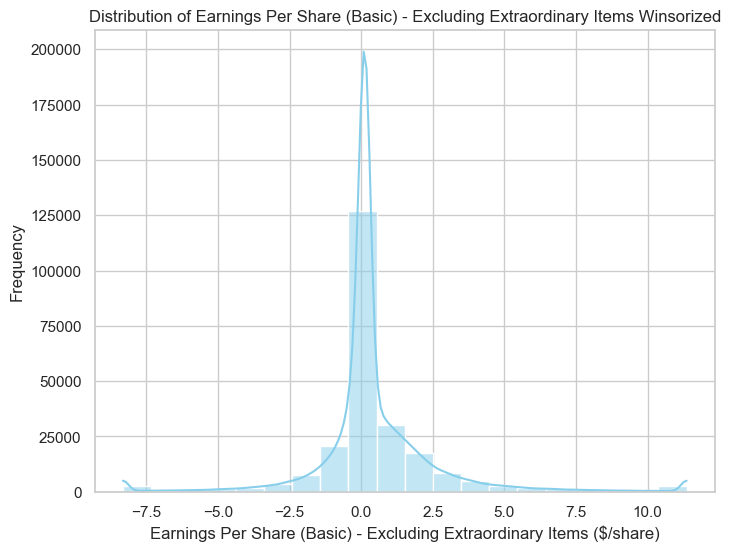

In [130]:
# 3. Data Visualization

# 3.1 Histogram of Earnings Per Share (Basic) - Excluding Extraordinary Items Winsorized
plt.figure(figsize=(8,6))
sns.histplot(fin_data['epspx_winsorized'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Earnings Per Share (Basic) - Excluding Extraordinary Items Winsorized')
plt.xlabel('Earnings Per Share (Basic) - Excluding Extraordinary Items ($/share)')
plt.ylabel('Frequency')
plt.show()

C:\Users\andy_\AppData\Local\Temp\ipykernel_22176\1353957764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fyear', y='ni_winsorized', data=fin_data, palette='Set2')


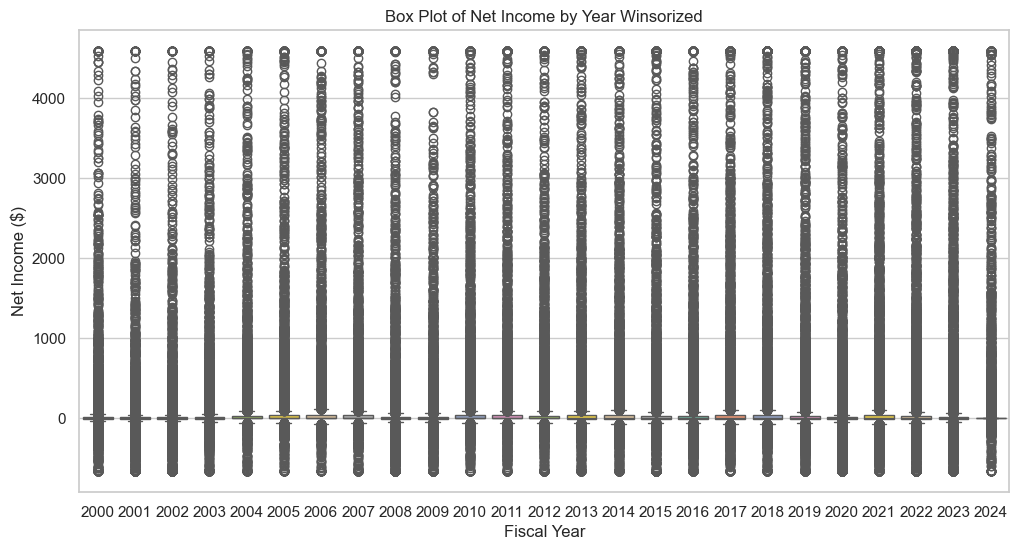

In [136]:
# 3.2 Box Plot of Net Income by Year Winsorized
plt.figure(figsize=(12,6))
sns.boxplot(x='fyear', y='ni_winsorized', data=fin_data, palette='Set2')
plt.title('Box Plot of Net Income by Year Winsorized')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income ($)')
plt.show()

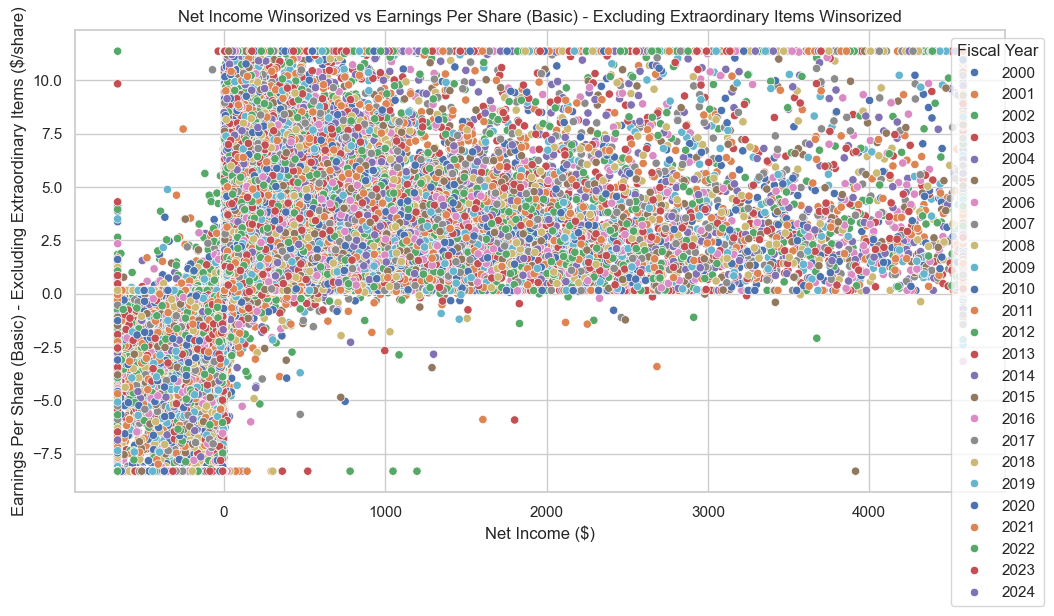

In [122]:
# 3.3 Scatter Plot of Net Income Winsorized vs Earnings Per Share (Basic) - Excluding Extraordinary Items Winsorized
plt.figure(figsize=(12,6))
sns.scatterplot(x='ni_winsorized', y='epspx_winsorized', data=fin_data, hue='fyear', palette='deep')
plt.legend(title="Fiscal Year", bbox_to_anchor=(1.05, 1), loc="upper right")
plt.title('Net Income Winsorized vs Earnings Per Share (Basic) - Excluding Extraordinary Items Winsorized')
plt.xlabel('Net Income ($)')
plt.ylabel('Earnings Per Share (Basic) - Excluding Extraordinary Items ($/share)')
plt.show()

C:\Users\andy_\AppData\Local\Temp\ipykernel_22176\3037271558.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fyear', y='epspx_winsorized', data=fin_data, ci=None, palette='pastel')
C:\Users\andy_\AppData\Local\Temp\ipykernel_22176\3037271558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fyear', y='epspx_winsorized', data=fin_data, ci=None, palette='pastel')


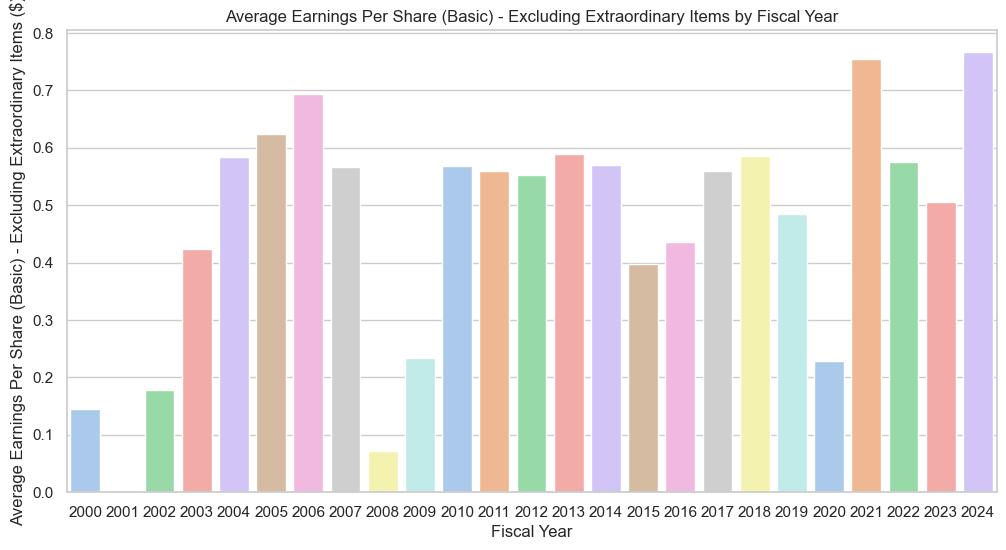

In [132]:
# 3.4 Bar Chart of Average Earnings Per Share (Basic) - Excluding Extraordinary Items Winsorized
plt.figure(figsize=(12,6))
sns.barplot(x='fyear', y='epspx_winsorized', data=fin_data, ci=None, palette='pastel')
plt.title('Average Earnings Per Share (Basic) - Excluding Extraordinary Items Winsorized by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Average Earnings Per Share (Basic) - Excluding Extraordinary Items ($)')
plt.show()

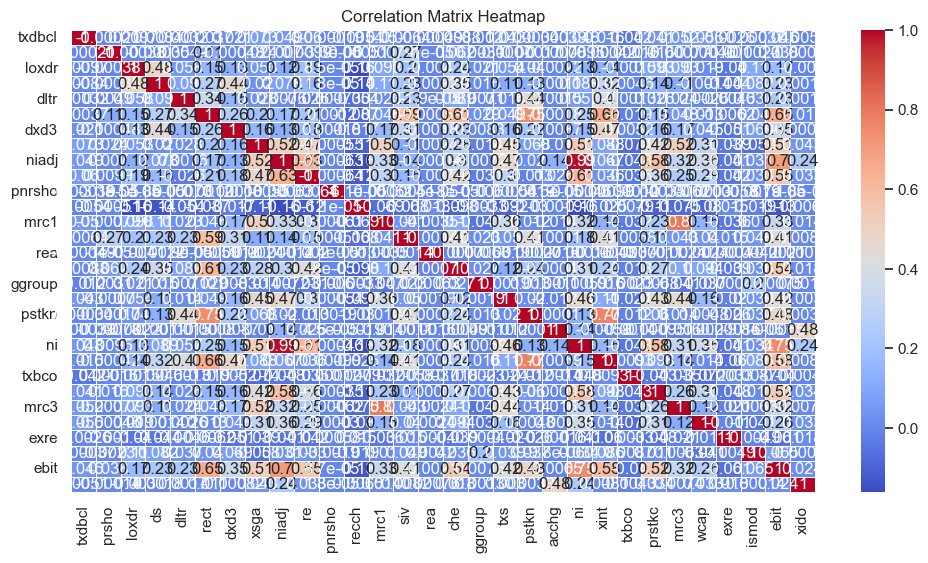

In [142]:
# 3.5 Heatmap of Correlation Matrix
random_cols = np.random.choice(fin_data.select_dtypes(include=[np.number]).columns, 30, replace=False)
corr_matrix = fin_data[random_cols].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [139]:
# 4. Handling Categorical Data Separately

# Select categorical columns
categorical_cols = fin_data.select_dtypes(include=['category', 'object']).columns
print("\nCategorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['datadate', 'indfmt', 'consol', 'popsrc', 'datafmt', 'conm', 'curcd',
       'curncd', 'costat', 'fic', 'add1', 'city', 'idbflag', 'loc'],
      dtype='object')


In [144]:
# Frequency count for categorical columns
print("\nFrequency Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(fin_data[col].value_counts())


Frequency Counts for Categorical Columns:

Column: datadate
datadate
31dec2022    8660
31dec2023    8588
31dec2021    8467
31dec2020    8158
31dec2019    7788
             ... 
28feb2021      51
31may2024      51
28feb2023      47
29feb2024      45
30nov2024      40
Name: count, Length: 295, dtype: int64

Column: indfmt
indfmt
INDL    235996
Name: count, dtype: int64

Column: consol
consol
C    235996
Name: count, dtype: int64

Column: popsrc
popsrc
D    235996
Name: count, dtype: int64

Column: datafmt
datafmt
STD    235996
Name: count, dtype: int64

Column: conm
conm
LIMITLESS X HOLDINGS INC        34
EXELON CORP                     25
NOBLE CORP PLC                  25
FLAGSTAR FINANCIAL INC          25
REGIONS FINANCIAL CORP          25
                                ..
BANCO DE A EDWARDS SA            1
FNF INDUSTRIES INC               1
SLG REALISATIONS PLC             1
BLACK HAWK GAMING&DEV CO INC     1
SOCIAL CP HED HOLD III           1
Name: count, Length: 26154, dtype: int

C:\Users\andy_\AppData\Local\Temp\ipykernel_22176\3711357980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='costat', data=fin_data, palette='Set3')


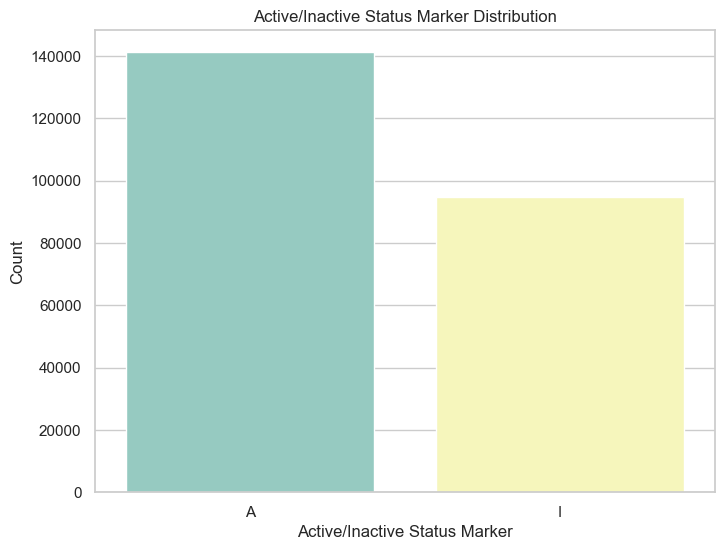

In [148]:
# Bar chart of Active/Inactive Status Marker
plt.figure(figsize=(8,6))
sns.countplot(x='costat', data=fin_data, palette='Set3')
plt.title('Active/Inactive Status Marker Distribution')
plt.xlabel('Active/Inactive Status Marker')
plt.ylabel('Count')
plt.show()

C:\Users\andy_\AppData\Local\Temp\ipykernel_22176\2700879542.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loc', data=filtered_data, palette='Set1', order=top_10_locs)


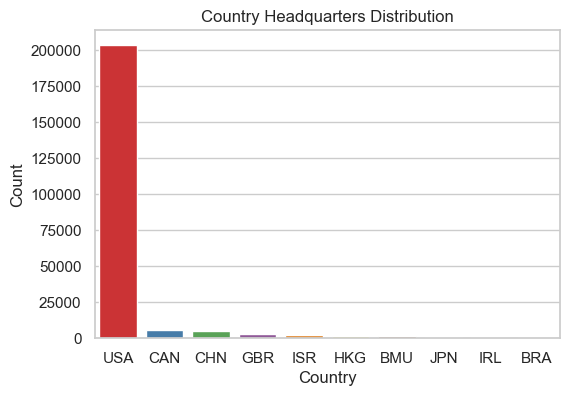

In [158]:
# Bar chart of Country Headquarters Distribution
top_10_locs = fin_data['loc'].value_counts().nlargest(10).index
# Filter the dataset to include only the top 10 locations
filtered_data = fin_data[fin_data['loc'].isin(top_10_locs)]
# Plot the countplot
plt.figure(figsize=(6,4))
sns.countplot(x='loc', data=filtered_data, palette='Set1', order=top_10_locs)
plt.title('Country Headquarters Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()